Nous effectuons maintenant les imports qui nous servirons plus tard

In [29]:
import pandas as pd
from scipy import stats
from scipy import special as sc
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad 

np.random.seed(7654321)

# Exercice 1

## Question 1

A partir des données, nous les trions par dates (après les avoir bien formatées) puis nous selectionnons les données avant l'accident puis nous enlevons celles avec des données manquantes. Enfin nous stockons les coûts de ces accidents dans le vecteur cost_accident

In [30]:
df=pd.read_csv("NuclearPowerAccidents2016.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index(df['Date'])
df=df.loc[df['Date'] < '1979-03-28']
df=df[df["Cost (millions 2013US$)"].isnull()==False]

cost_accident=df["Cost (millions 2013US$)"].values #Le vecteur des coût des accidents (strictement) avant l’accident de Three Mile Island, en million dollars 2013.

## Question 2
### 2.a)
   
   La fonction de répartition d'une loi normale effectue une bijection de $]-\infty, +\infty[$ sur $]0,1[$. Calculons donc l'image directe et il suffira alors de passer à l'image réciproque.
   $$F(\mu + \sqrt{\sigma^{2}}F^{-1}(p;0,1);\mu,\sigma^{2})=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \int_{-\infty}^{\mu + \sqrt{\sigma^{2}}F^{-1}(p;0,1)} e^{-\frac{(t-\mu)^{2}}{2 \sigma^{2}}} \,dt = \frac{1}{\sqrt{2 \pi \sigma^{2}}} (\int_{-\infty}^{\mu} e^{-\frac{(t-\mu)^{2}}{2 \sigma^{2}}} \,dt + \int_{\mu}^{\mu + \sqrt{\sigma^{2}}F^{-1}(p;0,1)} e^{-\frac{(t-\mu)^{2}}{2 \sigma^{2}}} \,dt)$$
   
   Puis en effectuant le changement de variable $u=\frac{t-\mu}{\sigma}$, on a:
   
$$\frac{1}{\sqrt{2 \pi \sigma^{2}}} (\int_{-\infty}^{\mu} e^{-\frac{(t-\mu)^{2}}{2 \sigma^{2}}} \,dt + \int_{\mu}^{\mu + \sqrt{\sigma^{2}}F^{-1}(p;0,1)} e^{-\frac{(t-\mu)^{2}}{2 \sigma^{2}}} \,dt) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} (\int_{-\infty}^{0} e^{-\frac{u^{2}}{2}} \sqrt{\sigma^{2}} \,dt + \int_{0}^{F^{-1}(p;0,1)} e^{-\frac{u^{2}}{2}} \sqrt{\sigma^{2}} \,dt) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{F^{-1}(p;0,1)} e^{-\frac{u^{2}}{2}} \,dt=F(F^{-1}(p;0,1);0,1)=p$$

Ainsi, en composant par $F^{-1}(p;\mu,\sigma^{2})$, on trouve bien le résultat.

### 2.b)

Le QQ-plot pour la loi normale est donnée par la courbe suivante :

((array([-2.24067415, -1.87510362, -1.66006004, -1.50227431, -1.37493955,
         -1.26666782, -1.17149966, -1.08590302, -1.00760151, -0.93503607,
         -0.86708833, -0.80292598, -0.74191073, -0.68354056, -0.62741195,
         -0.5731943 , -0.52061206, -0.4694319 , -0.41945333, -0.37050163,
         -0.32242247, -0.27507767, -0.22834187, -0.18209983, -0.13624414,
         -0.0906733 , -0.04529008,  0.        ,  0.04529008,  0.0906733 ,
          0.13624414,  0.18209983,  0.22834187,  0.27507767,  0.32242247,
          0.37050163,  0.41945333,  0.4694319 ,  0.52061206,  0.5731943 ,
          0.62741195,  0.68354056,  0.74191073,  0.80292598,  0.86708833,
          0.93503607,  1.00760151,  1.08590302,  1.17149966,  1.26666782,
          1.37493955,  1.50227431,  1.66006004,  1.87510362,  2.24067415]),
  array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+00, 1.2000e+00,
         4.4000e+00, 6.1000e+00, 1.1400e+01, 1

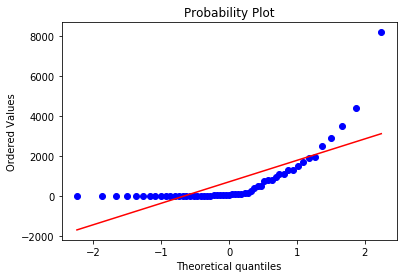

In [31]:
stats.probplot(cost_accident,dist = "norm",plot=plt)

### 3.a)

On a :

$$F(x;\lambda)=p \iff 1-e^{-\lambda x}=p \iff x=\frac{1}{\lambda}ln(\frac{1}{1-p})$$

Or $F(x;1)=p \iff x=ln(\frac{1}{1-p})$.

Donc $F(x;\lambda)=p \iff x=\frac{1}{\lambda}F^{-1}(p;1)$

Et donc : $F^{-1}(p;\lambda)=\frac{1}{\lambda}F^{-1}(p;1)$

### 3.b)

Le QQ-plot de données pour la loi exponentielle est donné ci-dessous

((array([1.01260268, 1.03086056, 1.04966429, 1.06882839, 1.08836694,
         1.10829487, 1.128628  , 1.14938317, 1.17057826, 1.19223233,
         1.2143657 , 1.23700006, 1.26015862, 1.28386625, 1.3081496 ,
         1.33303734, 1.35856032, 1.38475183, 1.41164782, 1.43928725,
         1.46771239, 1.49696921, 1.52710786, 1.55818315, 1.59025517,
         1.62338998, 1.65766044, 1.69314718, 1.72993971, 1.7681378 ,
         1.80785313, 1.84921125, 1.89235392, 1.93744214, 1.98465969,
         2.03421771, 2.08636037, 2.14137218, 2.19958736, 2.26140218,
         2.32729132, 2.39782998, 2.47372453, 2.55585563, 2.64534074,
         2.74362749, 2.85263812, 2.97500261, 3.11445546, 3.27655635,
         3.47011547, 3.71035576, 4.02719843, 4.49366684, 5.38014083]),
  array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+00, 1.2000e+00,
         4.4000e+00, 6.1000e+00, 1.1400e+01, 1.1800e+01, 1.3900e+01,
         1.5000e+01, 1.6100e+01,

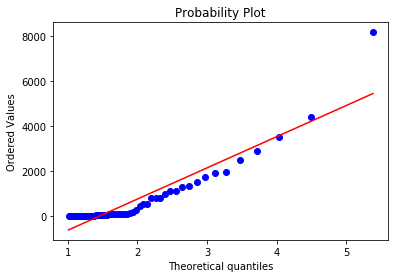

In [32]:
stats.probplot(cost_accident, sparams=(1,), dist=stats.expon, plot=plt)

## Question 4

Aux vues des QQ-plots, il semblerait qu'une loi exponentielle soit plus adaptée : en effet, la courbe a plus tendance à suivre la droite dans ce cas.




# Exercice 2

## Question 1

Posons $x=(x_{1},...,x_{n})$. On a :

$$M(x,\lambda)=-log p(x,\lambda) = -log \prod_{i=1}^{n} \lambda e^{-\lambda x_{i}} = -log \lambda^{n} e^{-\lambda \sum_{i=1}^{n} x_{i}} = \lambda \sum_{i=1}^{n} x_{i} - n log(\lambda )$$

Donc $\frac{\partial M}{\partial \lambda} (X,\lambda) = \sum_{i=1}^{n} X_{i} - \frac{n}{\lambda}$

Puis $\frac{\partial M}{\partial \lambda} (X,\lambda)=0 \iff \lambda = \frac{n}{\sum_{i=1}^{n} X_{i}}$

L'estimateur du maximum de vraissemblance est donc : $\hat{\lambda_{n}} = \frac{n}{\sum_{i=1}^{n} X_{i}}$

## Question 2

Ci-dessous le tracé de l'histogramme des données avec la densité de probabilité de la loi exponentielle avec le paramètre $\hat{\lambda_{n}}$ :

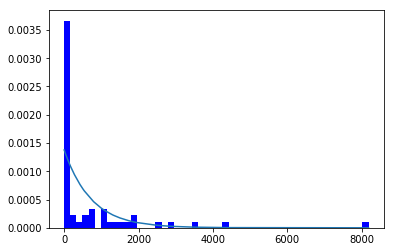

In [33]:
plt.hist(cost_accident,bins=50,color='blue',density=True)

def exponential_density(l,x):
    return l*np.exp(-l*x)


plt.plot(cost_accident, exponential_density(len(cost_accident)/sum(cost_accident),cost_accident))

## Question 3

D'une part : $\mathbb{E}_{\lambda}(T_{1})=\frac{1}{n} \sum_{i=1}^{n} \mathbb{E}_{\lambda}(X_{i})=\frac{1}{\lambda}=g_{1}(\lambda)$. L'estimateur est donc sans biais.

D'autre part : $Var_{\lambda}(T_{1}(X))=\frac{1}{n^{2}} \sum_{i=1}^{n} Var_{\lambda}(X_{i})=\frac{1}{n \lambda^{2}}$ et $I(\lambda) = - \mathbb{E}_{\lambda} (\frac{\partial^{2} log p}{\partial \lambda^{2}} (X,\lambda)) = - \mathbb{E}_{\lambda} (\frac{\partial^{2}}{\partial \lambda^{2}} -\lambda \sum_{i=1}^{n} x_{i} + n log(\lambda ))=\mathbb{E}_{\lambda} (\frac{n}{\lambda^{2}})=\frac{n}{\lambda^{2}}$

Ainsi : $\frac{g'_{1}(\lambda)^{2}}{I(\lambda)} = \frac{\lambda^{2}}{n \lambda^{4}} = \frac{1}{n \lambda^{2}}$. La borne de Cramér-Rao est atteinte.

Nous pouvons donc conclure que $T_{1}(X)$ est un estimateur efficace pour $g_{1}(\lambda)$

## Question 4

Le calcul de $g_{1}$ est donné par ce qui suit :

In [34]:
print("g_1=",sum(cost_accident)/len(cost_accident))

g_1= 726.3363636363636


## Question 5

On a : $R(\lambda, \tilde{T}_{1,\eta}) = b(\lambda,\tilde{T}_{1,\eta})^{2} + Var_{\lambda}(\tilde{T}_{1,\eta}(X)) $ avec $Var_{\lambda}(\tilde{T}_{1,\eta}(X)) = \eta^{2} Var_{\lambda}(T_{1}(X))$ et $ b(\lambda,\tilde{T}_{1,\eta})^{2} = \mathbb{E}_{\lambda}(\eta \tilde{T}_{1,\eta}(X)-g_{1}(\lambda))^{2}=((\eta -1)g_{1}(\lambda))^{2}$

Or $R(\lambda, T_{1})=b(\lambda,T_{1})^{2} + Var_{\lambda}(T_{1}(X))= Var_{\lambda}(T_{1}(X)) = \frac{1}{n \lambda^{2}} = \frac{g_{1}(\lambda)^{2}}{n}$

Donc $R(\lambda, \tilde{T}_{1,\eta}) < R(\lambda, T_{1}) \iff ((\eta -1))^{2} + \frac{\eta^{2}}{n} < \frac{1}{n} \iff \eta \in ]\frac{n-1}{n+1},1[$

Donc $\forall \lambda >0, R(\lambda, \tilde{T}_{1,\eta}) < R(\lambda, T_{1}) \iff \eta \in ]\frac{n-1}{n+1},1[$.

Cela n'est pas en contradiction avec la question précédente dans la mesure où pour $\eta \ne 1$, $\tilde{T}_{1,\eta}$ est biaisé. De plus, $T_{1}$ reste un estimateur efficace pour  $g_{1}(\lambda)$ mais $\tilde{T}_{1,\eta}$ pour $\eta \in ]\frac{n-1}{n+1},1[$ est un estimateur uniformément optimal pour sa part (ce qui n'est pas en contradiction avec ce qui peut précéder).

## Question 6

Pour une loi exponentielle de paramètre $\lambda$, la médiane est donnée par $m=\frac{ln(2)}{\lambda}$. On cherche donc $\eta$ tel que $\mathbb{E}_{\lambda}(\eta \tilde{T}_{1,\eta}(X))=m$.

On a $\mathbb{E}_{\lambda}(\eta \tilde{T}_{1,\eta}(X))=m \iff \mathbb{E}_{\lambda}(T_{1}(X))=\frac{m}{\eta} \iff \frac{1}{\lambda}=\frac{m}{\eta} \iff \eta = ln(2)$.

Le calcul de cet estimateur et la médiane empirique sont données ci-dessous :

In [35]:
print("estimateur T_{1,eta}=",(np.log(2)*sum(cost_accident)/(len(cost_accident))))
print("médiane empirique=",np.median(cost_accident))

estimateur T_{1,eta}= 503.45800259270857
médiane empirique= 89.9


Une telle différence dans la médiane provient sûrement du fait qu'il y a beaucoup de valeur nulle dans notre base de données.

## Question 7

Posons donc $\eta = ln(2)$.

D'après la question 5, $\forall \lambda >0, R(\lambda, \tilde{T}_{1,\eta}) < R(\lambda, T_{1}) \iff \eta \in ]\frac{n-1}{n+1},1[$.

On a bien $ln(2)<1$. Puis $ln(2)>\frac{n-1}{n+1} \iff n < -\frac{ln(2)+1}{ln(2)-1}$ $\textit{i.e}$ $n \leq 5$.

Donc $R(\lambda, \tilde{T}_{1,ln(2)}) < R(\lambda, T_{1}) \iff n \leq 5$

# Exercice 3

## Question 1

On formule l'hypothèse null $H_{0}$:"le coût moyen est inférieur ou égal à 1 milliard de dollars" ($\textit{i.e}$ $\frac{1}{\lambda} \leq 10^{3}$ car nous raisonnons en millions de dollars) et l'hypothèse alternative $H_{1}$:"le coût moyen est strictement supérieur à 1 milliard de dollars" ($\textit{i.e}$ $\frac{1}{\lambda} > 10^{3}$)

Ces 2 hypothèses sont donc équivalentes à $H_{0} : " \lambda \geq 10^{-3}"$ et $H_{1} : " \lambda < 10^{-3}"$ et c'est celles-ci que nous retiendrons donc.

## Question 2

On formule les hypothèses intermédiaires suivantes : 

- $\tilde{H_{0}} : " \lambda = \lambda_{0}$ avec $\lambda_{0} \geq 10^{-3}"$
- $\tilde{H_{1}} : " \lambda = \lambda_{1}$ avec $\lambda_{1} < 10^{-3}"$

Donc $\lambda_{0} > \lambda_{1}$ en particulier. 

Le test du rapport de vraissemblance s'écrit pour le niveau $\alpha$ :

$\lambda (\lambda_{1},\lambda_{0};x)=\frac{\prod_{i=1}^{n} \lambda_{1} e^{-\lambda_{1} x_{i}}}{\prod_{i=1}^{n} \lambda_{0} e^{-\lambda_{0} x_{i}}}=(\frac{\lambda_{1}}{\lambda_{0}})^{n} e^{(\lambda_{0}-\lambda_{1}) \sum_{i=1}^{n} x_{i}} < k_{\alpha}$

On est donc ramené à comparer $\sum_{i=1}^{n} X_{i}$ avec un certain seuil $C$ : le rapport de vraissemblance étant croissant selon $\sum_{i=1}^{n} X_{i}$ on rejette $H_{0}$ si $\sum_{i=1}^{n} X_{i} > C$. De plus comme les $X_{i}$ sont i.i.d et suivent une loi exponentielle de paramètre $\lambda$, $\sum_{i=1}^{n} X_{i}$ suit une loi $Gamma(n,\lambda)$.

Puis : $\mathbb{P}(\sum_{i=1}^{n} X_{i}>C | H_{0})=\alpha \iff \mathbb{P}(\sum_{i=1}^{n} X_{i}>C | \sum_{i=1}^{n} X_{i} \sim Gamma(n,\lambda_{0}))=\alpha \iff \mathbb{P}(\frac{1}{n} \sum_{i=1}^{n} X_{i}>\frac{C}{n} | \frac{1}{n} \sum_{i=1}^{n} X_{i} \sim Gamma(n, n \times \lambda_{0})) \iff \mathbb{P}(\frac{1}{n} \sum_{i=1}^{n} X_{i}>q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})} | H_{0})=\alpha$.

Donc on rejette l'hypothèse $H_{0}$ si $\frac{1}{n} \sum_{i=1}^{n} X_{i}>q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})}$. D'après le lemme de Neyman-Pearson, c'est le test le plus puissant pour le niveau $\alpha$.

## Question 3

Nous avons vu que le test consiste à vérifier si $\frac{1}{n} \sum_{i=1}^{n} X_{i}>q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})}$. Or, il faut chercher pour quel valeur de $\lambda_{0}$ la quantité $q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})}$ est maximale afin d'avoir le test le plus discriminant possible.

On sait que $q_{1-\alpha}^{Gamma(n,n \times \lambda)} = F^{-1}(1-\alpha; Gamma(n,n\times \lambda))$. On s'intéresse donc à la monotonie de $F^{-1}(1-\alpha; Gamma(n,n\times \lambda))$ en fonction de $\lambda$. Sans perte de généralité, $F^{-1}(1-\alpha; Gamma(n,n \times \lambda))$ et $F(1-\alpha; Gamma(n,n \times \lambda))$ étant de même monotonie, on se ramène à l'étude de $F(1-\alpha; Gamma(n,n \times \lambda))$.

L'allure de $F(1-\alpha; Gamma(n,n \times \lambda))$ en fonction de $\lambda$ est donnée ci-dessous :




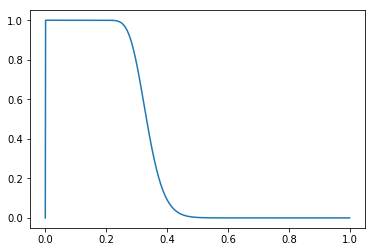

In [36]:
a=np.linspace(0.0001,1,1000)
def gamma_density(l,n,x):
    return (l**n)*(x**(n-1))*np.exp(-l*x)/math.gamma(n)

F=[]
for lam in a:
    def f(x):
        return gamma_density(1/(55*lam),55,x)
    res, err = quad(f,0,1000)
    F.append(res)
plt.plot(a,F)

Nous constatons donc que $F(1-\alpha; Gamma(n,.))$ est décroissante en fonction de $\lambda$ et donc $F(1-\alpha; Gamma(n,.))$ de même. Par conséquent, $q_{1-\alpha}^{Gamma(n,n \times \lambda)}$ est maximale sur $[10^{-3},+\infty[$ pour $\lambda=10^{-3}$. Il nous suffit alors donc de tester pour cette valeur :



In [37]:
random_values=stats.gamma.rvs(55, scale = 1/(55*0.001),  size = 1000)
quantiles = np.quantile(random_values,0.95)
print("somme des coûts divisé par n = ", sum(cost_accident)/len(cost_accident))
print("quantile de la loi gamma(55,55x0.001) à 0.95 =",quantiles)
if (quantiles>=sum(cost_accident)/len(cost_accident)):
    print("Nous ne sommes pas dans la région du rejet : H0 n'est pas rejetée")
else:
    print("Nous sommes dans la région du rejet : H0 est rejetée")

somme des coûts divisé par n =  726.3363636363636
quantile de la loi gamma(55,55x0.001) à 0.95 = 1232.5363902385322
Nous ne sommes pas dans la région du rejet : H0 n'est pas rejetée


Nous pouvons donc constater qu'il n'y a pas rejet pour tout $\lambda \geq 10^{-3}$. On peut donc affirmer l'hypothèse nulle et donc affirmer que le coût moyen d’accident est inférieur à un milliard de dollars.

Sa p-valeur est donnée par : $\mathbb{P}(\frac{1}{n} \sum_{i=1}^{n} X_{i} > \overline{x})$ avec $\overline{x}$ la moyenne empirique. On a donc : $p-valeur=1-F^{Gamma(n,n \times 10^{-3})}(\overline{x})$ avec $F^{Gamma(n,n \times 10^{-3})}$ la fonction de répartition pour la loi Gamma explicitée, puisque comme $\sum_{i=1}^{n} X_{i} \sim Gamma(n,10^{-3})$ donc $T_{1} \sim Gamma(n,n \times 10^{-3})$. Le calcul de la p-valeur est donné ci-dessous :

In [38]:
1-stats.gamma.cdf(726.34,55,scale=1/(55*0.001))

0.9862813404636118

## Question 4

On a vu d'après la question précédente que $T_{1} \sim Gamma(n, n \times 10^{-3})$. En outre on a vu que la région de rejet est définie pour $\frac{1}{n} \sum_{i=1}^{n} X_{i}>q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})}$


1222.003816976862

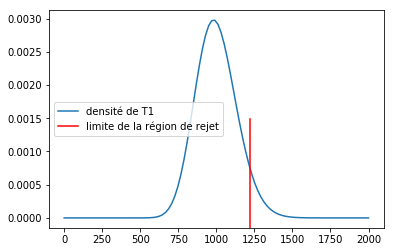

In [39]:
y=np.linspace(0,2000,100)
plt.plot(y,stats.gamma.pdf(y,55,loc=0,scale=1/(55*0.001)),label='densité de T1')
random_values=stats.gamma.rvs(55, scale = 1/(55*0.001),  size = 1000) #un jeu de variable aléatoire pour chaque lambda
quantiles = np.quantile(random_values,0.95)
plt.axvline(x=quantiles,ymin=0,ymax=0.5,color='r', label='limite de la région de rejet') #droite délimitant la zone de rejet à gauche
plt.legend()
quantiles


A droite de la droite rouge, nous nous trouvons dans la zone du rejet.

## Question 5

Nous devons donc tracer $\mathbb{P}(T_{1} > q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})} | \lambda=\tilde{\lambda})$ avec $\tilde{\lambda} < 10^{-3}$, qui équivaut à $\mathbb{P}(T_{1} > q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})} |T_{1} \sim Gamma(n, n \times \lambda))$ avec $\tilde{\lambda} < 10^{-3}$, ce qui revient à tracer $1-F^{Gamma(n,n \times \lambda)}(q_{1-\alpha}^{Gamma(n,n \times \lambda_{0})})$ avec $\lambda_{0}=10^{-3}$. En effet, nous avions établi à la question 3 que le quantile maximal en $1-\alpha$ était atteint pour cette valeur et donc qu'il s'agissait du test le plus discriminant. 

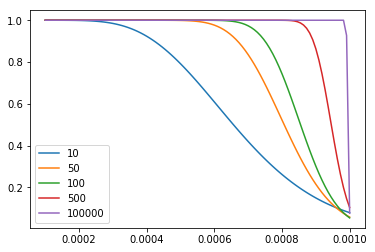

In [40]:
lam=np.linspace(10**-4,0.001,100)
taille=[10,50,100,500,100000]
for n in taille:
    F=[]
    q=[]
    random_values=gamma(n,1/(n*0.001),50)
    quantiles = (np.quantile(random_values,0.95)) 
    for i in range(len(lam)):
        F.append(1-stats.gamma.cdf(quantiles,n,scale=1/(n*lam[i])))
    plt.plot(lam,F,label=n)
    F=[]

plt.legend()


La puissance d'un test est la probabilité de rejeter $H_{0}$ alors qu'elle est fausse. Nous voyons ici que si elle est fausse elle est toujours presque sûrement rejetée quand n augmente : le modèle est donc plus réaliste quand nous avons beaucoup de données.

## Question 6

D'après le théorème centrale limite, on a $T_{1} \sim \mathcal{N}(\frac{1}{\lambda},\frac{1}{\lambda^{2}n})$ pour n suffisamment grand.

Pour le test, on cherche donc C tel que $\mathbb{P}(T_{1} > C) | \lambda = 10^{-3})=\alpha \iff \mathbb{P}(\frac{T_{1} - \frac{1}{\lambda}}{\frac{1}{\lambda \sqrt{n}}} > q_{1-\alpha}^{\mathcal{N}(0,1)} | \frac{T_{1} - \frac{1}{\lambda}}{\frac{1}{\lambda \sqrt{n}}} \sim \mathcal{N}(0,1) )=\alpha$

Nous rejetons donc $H_{0}$ si $\frac{T_{1} - \frac{1}{\lambda}}{\frac{1}{\lambda \sqrt{n}}} > q_{1-\alpha}^{\mathcal{N}(0,1)}$. Or $q_{1-\alpha}^{\mathcal{N}(0,1)} \simeq 1.645$ et $\frac{T_{1} - \frac{1}{\lambda}}{\frac{1}{\lambda \sqrt{n}}} =$ :

In [42]:
((10**-3)*sum(cost_accident)/np.sqrt(55))-np.sqrt(55)

-2.029543845973098

L'hypothèse $H_{0}$ n'est donc pas rejettée. 